In [46]:
!pip3 install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
train = pd.read_csv('train.csv')

In [47]:
test = pd.read_csv('test.csv')

In [48]:
train['TotalBath'] = train['FullBath'] + 0.5 * train['HalfBath']
test['TotalBath'] = test['FullBath'] + 0.5 * test['HalfBath']

In [49]:
features = ['GrLivArea','BedroomAbvGr','TotalBath']
x_train = train[features]
y_train = train['SalePrice']
x_test = test[features]

In [50]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [51]:
test['SalePrice'] = model.predict(x_test)

In [59]:
print(test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [62]:
submission = test[['Id', 'SalePrice']]
submission.to_csv('submission.csv', index=False)
print("submission.csv file created")

submission.csv file created


In [53]:
y_train_pred = model.predict(x_train)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

In [54]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"r2 Score: {r2:.4f}")

Mean Squared Error: 2650808108.05
r2 Score: 0.5797


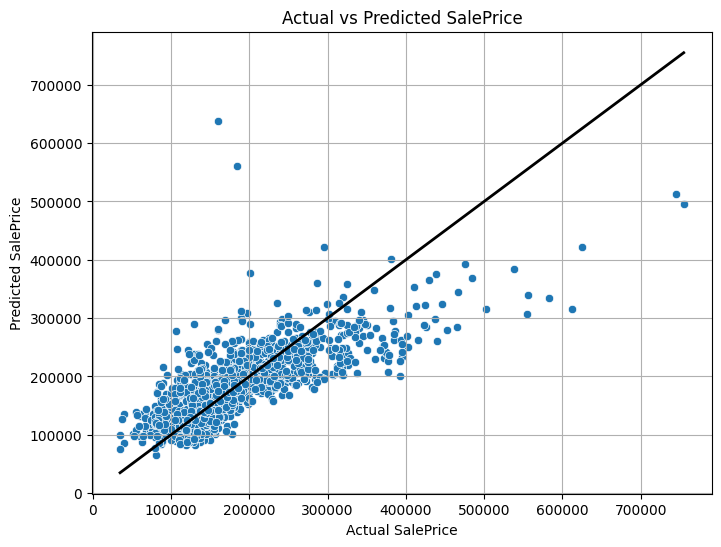

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_train, y=y_train_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linewidth=2)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice")
plt.grid(True)
plt.show()

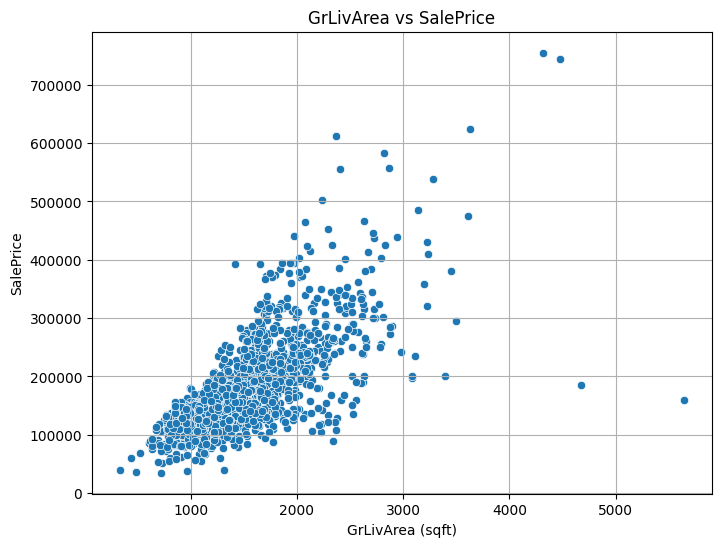

In [56]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.xlabel("GrLivArea (sqft)")
plt.ylabel("SalePrice")
plt.title("GrLivArea vs SalePrice")
plt.grid(True)
plt.show()